# Análise dos dados de temperatura do aquaterrário

Aluno: Robson Ricardo Leite da Silva
</br> Mat.: 2212120015

In [1]:
# Importação das Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Importação dos dados coletados pelo Arduino
dados = pd.read_csv('C:\\Users\\jobsr\\OneDrive\\Documentos\\DATA.CSV', sep=';')

dados.head()

,data,horario,temp_ambiente,temp_agua,umid_ar
0,22/10/2023,10:29:2,27.25,26.69,43.0
1,22/10/2023,10:40:1,27.62,26.75,43.0
2,22/10/2023,10:45:33,27.37,26.75,43.0
3,22/10/2023,10:50:33,27.44,26.81,43.0
4,22/10/2023,10:55:34,28.00,26.81,43.0


In [124]:
# Informações sobre os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data           7247 non-null   object 
 1   horario        7247 non-null   object 
 2   temp_ambiente  7247 non-null   float64
 3   temp_agua      7247 non-null   float64
 4   umid_ar        7247 non-null   float64
dtypes: float64(3), object(2)
memory usage: 283.2+ KB


</br>

### Limpeza dos Dados

In [3]:
# Transforma a coluna 'data' em datetime
dados['data'] = pd.to_datetime(dados['data'], dayfirst=True)

In [126]:
# Remova os dados incompletos do dia 15/11/2023 e 16/11/2023
dados = dados.drop(dados[dados['data'] == '15/11/2023'].index)
dados = dados.drop(dados[dados['data'] == '16/11/2023'].index)

In [4]:
# Visualização dos resultados da limpeza
dados.tail()

,data,horario,temp_ambiente,temp_agua,umid_ar
7242,2023-11-16,15:47:37,30.12,29.12,22.0
7243,2023-11-16,15:52:37,30.56,29.06,22.0
7244,2023-11-16,15:57:38,30.62,29.06,21.0
7245,2023-11-16,16:2:39,30.75,29.06,21.0
7246,2023-11-16,16:7:40,30.81,29.12,21.0


<br>

### Estatísticas Descritivas

In [5]:
# Cálculo de Estatísticas Descritivas das colunas temp_ambiente, temp_agua e umid_ar
round(dados[['temp_ambiente', 'temp_agua', 'umid_ar']].describe(), 2)

,temp_ambiente,temp_agua,umid_ar
count,7247.00,7247.00,7247.00
mean,28.06,27.32,35.91
std,1.42,0.92,9.72
min,24.56,25.12,20.00
25%,26.87,26.56,28.00
50%,28.00,27.25,37.00
75%,29.06,27.87,45.00
max,33.50,31.62,53.00


In [6]:
# Calcular a média da temp_ambiente no dia 12/11/2023
round(dados[dados['data'] == '2023-11-12']['temp_ambiente'].mean(), 2)

30.27

In [7]:
# Calcular a média da temp_agua no dia 12/11/2023
round(dados[dados['data'] == '2023-11-12']['temp_agua'].mean(), 2)

28.71

In [12]:
# Maior valor de temp_ambiente
dados['temp_ambiente'].max()

33.5

In [13]:
# Menor valor de temp_ambiente
dados['temp_ambiente'].min()

24.56

In [10]:
# Transforma a coluna 'horario' em datetime
dados['horario'] = pd.to_datetime(dados['horario'], format='%H:%M:%S')


In [11]:
# Calcular a média de temp_ambiente por horário
dados.groupby(dados['horario'].dt.hour)['temp_ambiente'].mean()


horario
0     28.064916
1     28.043266
2     27.990702
3     27.937458
4     27.858261
5     27.628933
6     27.077833
7     26.913000
8     26.900067
9     27.319000
10    27.832393
11    28.363023
12    28.699032
13    28.927170
14    29.041576
15    28.980994
16    28.866877
17    28.605452
18    28.482886
19    28.226567
20    27.980700
21    27.778867
22    27.829329
23    28.025652
Name: temp_ambiente, dtype: float64

In [12]:
# Calcular a média de temp_agua por horário
dados.groupby(dados['horario'].dt.hour)['temp_agua'].mean()

horario
0     27.408562
1     27.344175
2     27.270401
3     27.214950
4     27.162074
5     27.100100
6     26.922400
7     26.697067
8     26.538930
9     26.541667
10    26.716164
11    27.000997
12    27.267323
13    27.508842
14    27.734920
15    27.863462
16    27.878007
17    27.856522
18    27.818826
19    27.770233
20    27.627433
21    27.493533
22    27.434362
23    27.442776
Name: temp_agua, dtype: float64

In [13]:
# Calcular a média de umid_ar por horário
dados.groupby(dados['horario'].dt.hour)['umid_ar'].mean()

horario
0     38.010033
1     37.875421
2     37.889632
3     37.979933
4     38.023411
5     37.893333
6     38.400000
7     38.330000
8     37.966555
9     37.600000
10    36.537705
11    35.318328
12    33.732258
13    33.019293
14    32.225080
15    31.483974
16    32.428571
17    33.454849
18    33.755034
19    34.156667
20    35.163333
21    36.023333
22    37.120805
23    37.896321
Name: umid_ar, dtype: float64

<br>

### Dias de Coleta

In [8]:
print("Foram registrados", dados['data'].value_counts().count(), "dias de medição.")
print("Para cada dia, foram realizadas uma média de", round(dados['data'].value_counts().mean(), 2), "medições.")

Foram registrados 26 dias de medição.
Para cada dia, foram realizadas uma média de 278.73 medições.


---

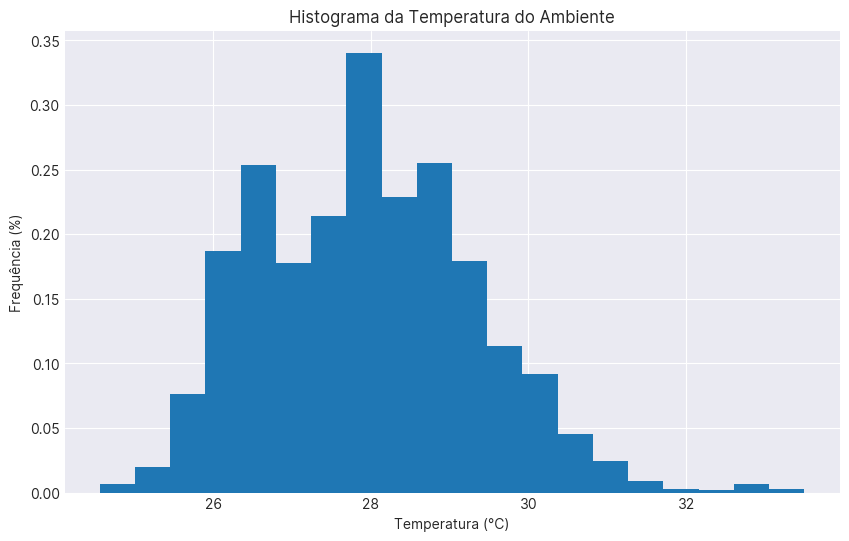

In [144]:
# Histograma da Temperatura do Ambiente, com a Frequência em porcentagem
plt.figure(figsize=(10, 6))
plt.hist(dados['temp_ambiente'], bins=20, density=True)
plt.title('Histograma da Temperatura do Ambiente')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência (%)')
plt.show()


### Médias das Temperaturas e da Umidade do Ar

### Plotagem da Temperatura Ambiente ao longo dos 24 dias de coleta

In [130]:
# Defina o estilo do gráfico
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams["font.family"] = "Inter"

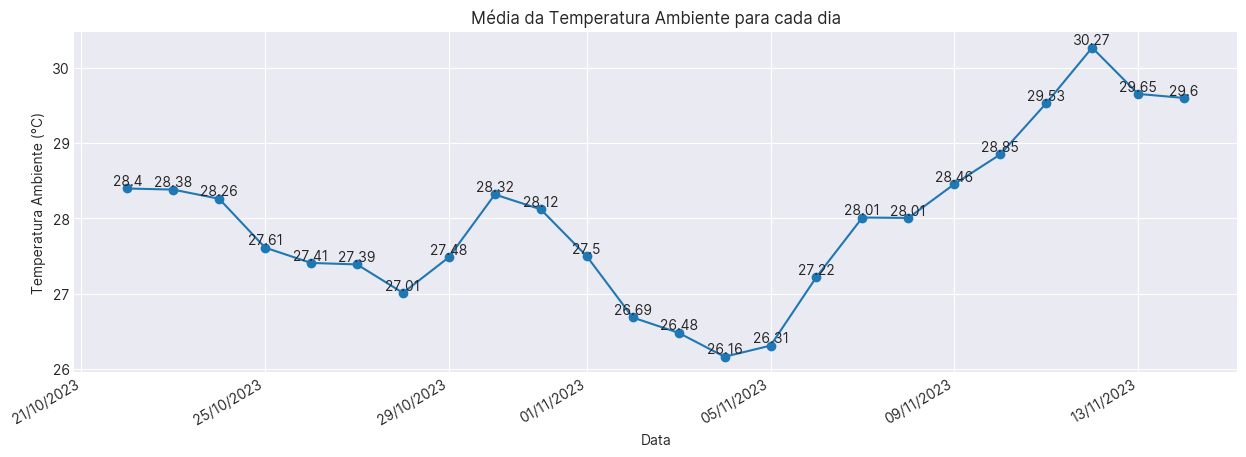

In [140]:
# Plotagem do gráfico com a média da temperatura ambiente para cada dia
# Converta a coluna 'data' para o tipo datetime
dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')

# Plotagem do gráfico com a média da temperatura ambiente para cada dia
plt.figure(figsize=(15, 5))
plt.title('Média da Temperatura Ambiente para cada dia')
plt.xlabel('Data')
plt.ylabel('Temperatura Ambiente (°C)')

# Use o formato de data para os ticks do eixo X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d/%m/%Y'))

# Ajuste para evitar que os ticks se sobreponham
plt.gcf().autofmt_xdate()

# Mostrar 

plt.plot(dados.groupby('data')['temp_ambiente'].mean(), marker='o')
# Mostrar o dado de temperatura acima de cada ponto
for x, y in zip(dados['data'].unique(), dados.groupby('data')['temp_ambiente'].mean()):
    plt.text(x, y, round(y, 2), ha='center', va='bottom', fontsize=10)
plt.show()


In [142]:
# Plotagem do gráfico interativo com a média da temperatura ambiente para cada dia, usando o Plotly
# Agrupe os dados pela média da temperatura ambiente para cada dia
media_temp_ambiente = dados.groupby('data')['temp_ambiente'].mean().reset_index()

# Crie o gráfico usando o Plotly Express
fig = px.line(media_temp_ambiente, x='data', y='temp_ambiente', title='Média da Temperatura Ambiente para cada dia')
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Temperatura Ambiente (°C)')
# Mostrar o dado de temperatura
fig.update_traces(text=media_temp_ambiente['temp_ambiente'].round(2), textposition='top center')

# Exiba o gráfico
fig.show()

C:\Users\jobsr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



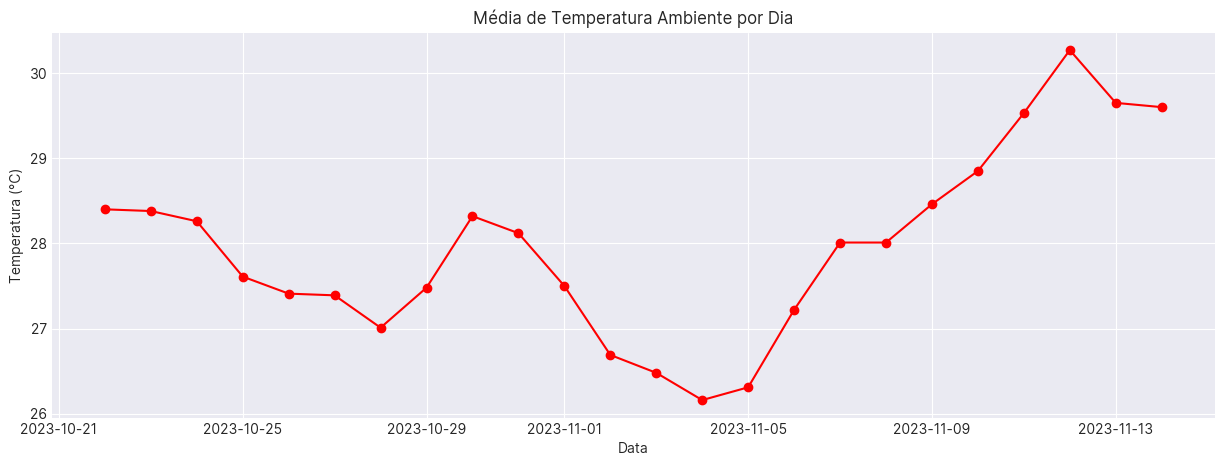

In [122]:
# Plotagem do gráfico com a média de temperatura ambiente por dia
plt.figure(figsize=(15, 5))
plt.plot(media_temp_ar, color='red', marker='o')
plt.title('Média de Temperatura Ambiente por Dia')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.show()


</br>

# Análise dos dados

### Análise de dados discrepantes

In [5]:
# Boxplot da temperatura da água e da temperatura ambiente, para verificar a existência de outliers
fig = px.box(dados, y=['temp_agua', 'temp_ambiente'], title='Boxplot da temperatura da água e da temperatura ambiente')
fig.show()

### Análise da Temperatura da Água - Sensor DS18B20

In [10]:
# Separação dos dados do dia 18/09/2023
dados_dia1 = dados.loc[dados['data'] == '18/9/2023']

# Gráfico da variação da temperatura da água e da temperatura ambiente no dia 18/09/2023
fig = px.line(dados_dia1, x='horario', y='temp_agua', title='Variação da temperatura da água e da temperatura ambiente no dia 18/09/2023')
fig.show()


In [11]:
# Separação dos dados do dia 19/09/2023
dados_dia2 = dados.loc[dados['data'] == '19/9/2023']

# Gráfico da variação da temperatura da água e da temperatura ambiente no dia 19/09/2023
fig = px.line(dados_dia2, x='horario', y='temp_agua', title='Variação da temperatura da água e da temperatura ambiente no dia 19/09/2023')
fig.show()

In [12]:
# Média da temperatura da água

# Qual foi a média da temperatura da água durante as 24 horas?
print("Média da temperatura da água:", round(dados['temp_agua'].mean(), 2), "°C")

Média da temperatura da água: 26.38 °C


In [14]:
# Temperaturas máximas

# Qual foi a maior temperatura da água?
max_temp_agua = dados['temp_agua'].max()
print("Temperatura Máxima da Água:", max_temp_agua, "°C")

# Em qual horário ocorreu a maior temperatura da água?
hora_max_temp_agua = dados[dados['temp_agua'] == max_temp_agua]['horario']
print("Horários com temperatura máxima registrada:", list(hora_max_temp_agua))

Temperatura Máxima da Água: 28.75 °C
Horários com temperatura máxima registrada: ['17:42:9', '17:42:25']


In [15]:
# Temperaturas mínimas

# Qual foi a menor temperatura da água?
min_temp_agua = dados['temp_agua'].min()
print("Temperatura Mínima da Água:", min_temp_agua, "°C")

# Em qual horário ocorreu a maior temperatura da água?
hora_min_temp_agua = dados[dados['temp_agua'] == min_temp_agua]['horario']
print("Horários com temperatura mínima registrada:", list(hora_min_temp_agua))

Temperatura Mínima da Água: 25.12 °C
Horários com temperatura mínima registrada: ['8:41:46', '8:48:19', '8:48:51', '8:53:19', '8:53:34', '8:54:6', '8:55:9', '8:56:43', '8:56:59', '8:57:30', '8:57:46', '8:58:49', '8:59:5', '9:0:23', '9:1:26', '9:3:1', '9:3:48', '9:4:4', '9:4:35', '9:4:51', '9:5:7', '9:5:22', '9:5:38', '9:5:54', '9:6:10', '9:6:25', '9:6:41', '9:6:57', '9:7:44', '9:8:0', '9:8:16', '9:8:47', '9:9:19', '9:9:34', '9:10:6', '9:10:37', '9:10:53', '9:11:24', '9:11:40', '9:12:12', '9:12:59', '9:13:30', '9:14:2', '9:14:33', '9:16:8', '9:17:26', '9:17:42', '9:25:19', '9:26:22', '9:32:8']


In [16]:
# Variação da temperatura da água

# Qual foi a maior variação da temperatura da água?
max_var_temp_agua = round((dados['temp_agua'].max() - dados['temp_agua'].min()), 2)

print("Variação Máxima da Temperatura da Água:", max_var_temp_agua, "°C")

Variação Máxima da Temperatura da Água: 3.63 °C


</br>

### Análise da Temperatura do Ambiente - Sensor LM35DZ

In [17]:
# Gráfico de variação da temperatura ambiente ao longo das 24 horas
fig = px.line(dados, x='hora', y='temp_ambiente', title='Variação da temperatura ambiente ao longo do tempo')
fig.show()

In [17]:
# Média da temperatura ambiente
print("Média da Temperatura do Ambiente:", round(dados['temp_ambiente'].mean(), 2), "°C")

Média da Temperatura do Ambiente: 28.35 °C


In [24]:
# Temperaturas máximas

# Qual foi a maior temperatura ambiente?
max_temp_ambiente = dados['temp_ambiente'].max()
print("Temperatura Máxima do Ambiente:", max_temp_ambiente, "°C")

# Em qual horário ocorreu a maior temperatura ambiente?
hora_max_temp_ambiente = dados[dados['temp_ambiente'] == max_temp_ambiente]['hora']
print("Horários com temperatura máxima registrada:", list(hora_max_temp_ambiente), hora_max_temp_ambiente.count(), "vezes")

Temperatura Máxima do Ambiente: 27.86 °C
Horários com temperatura máxima registrada: ['14:48:44', '14:49:15', '14:49:46', '14:50:16', '14:50:47', '14:51:18', '14:51:48', '14:52:19', '14:52:50', '14:53:20', '14:53:51', '14:54:22', '14:54:52', '14:55:23', '14:55:54', '14:56:24', '14:56:55', '14:57:26', '14:57:56', '14:58:27', '14:58:58', '14:59:28', '14:59:59', '15:0:30', '15:1:0', '15:1:31', '15:2:2', '15:2:32', '15:3:3', '15:3:33', '15:4:4', '15:4:35', '15:5:5', '15:5:36', '15:6:7', '15:6:37', '15:7:8', '15:7:39', '15:8:9', '15:8:40', '15:9:11', '15:9:41', '15:10:12', '15:10:43', '15:11:13', '15:11:44', '15:12:15', '15:12:45', '15:13:16', '15:13:47', '15:14:17', '15:14:48', '15:15:19', '15:15:49', '15:16:20', '15:16:51', '15:17:21', '15:17:52', '15:18:23', '15:18:53', '15:19:24', '15:19:55', '15:20:25', '15:20:56', '15:21:27', '15:21:57', '15:22:28', '15:22:59', '15:23:29', '15:24:0', '15:24:31', '15:25:1', '15:25:32', '15:26:3', '15:26:33', '15:27:4', '15:27:35', '15:28:5', '15:28:36'

In [25]:
# Temperaturas mínimas

# Qual foi a menor temperatura ambiente?
min_temp_ambiente = dados['temp_ambiente'].min()
print("Temperatura Mínima do Ambiente:", min_temp_ambiente, "°C")

# Em qual horário ocorreu a menor temperatura ambiente?
hora_min_temp_ambiente = dados[dados['temp_ambiente'] == min_temp_ambiente]['hora']
print("Horários com temperatura mínima registrada:", list(hora_min_temp_ambiente), hora_min_temp_ambiente.count())

Temperatura Mínima do Ambiente: 21.51 °C
Horários com temperatura mínima registrada: ['2:42:12', '2:54:28', '3:51:11', '4:15:43', '4:16:14', '4:33:36', '4:40:45', '5:4:16', '5:4:46', '5:11:55', '5:17:2', '5:18:34', '5:19:36', '5:20:6', '5:21:38', '5:22:9', '5:22:40', '5:23:10', '5:23:41', '5:24:12', '5:25:44', '5:33:23', '5:33:54', '5:35:57', '5:36:27', '5:36:58', '5:43:6', '5:45:39', '5:46:10', '5:46:40', '5:47:11', '5:47:42', '5:48:12', '5:48:43', '5:49:14', '5:49:44', '5:50:15', '5:50:46', '5:51:47', '5:53:19', '5:53:50', '5:54:20', '5:54:51', '5:55:22', '5:55:52', '5:57:24', '5:57:55', '5:59:27', '5:59:57', '6:0:59', '6:1:29', '6:2:0', '6:2:31', '6:3:1', '6:3:32', '6:4:33', '6:5:4', '6:5:35', '6:6:5', '6:6:36', '6:7:7', '6:8:39', '6:9:9', '6:9:40', '6:10:11', '6:10:41', '6:11:12', '6:11:43', '6:12:13', '6:12:44', '6:13:15', '6:13:45', '6:14:16', '6:14:46', '6:15:48', '6:16:18', '6:16:49', '6:17:20', '6:17:50', '6:18:21', '6:19:22', '6:19:53', '6:21:25', '6:22:26', '6:22:57', '6:23:

In [26]:
# Qual foi a maior variação da temperatura ambiente?
max_var_temp_ambiente = round((dados['temp_ambiente'].max() - dados['temp_ambiente'].min()), 2)

print("Variação Máxima da Temperatura do Ambiente:", max_var_temp_ambiente, "°C")

Variação Máxima da Temperatura do Ambiente: 6.35 °C
